# EDA Example

For this practice, you will need the following datasets:

- **Simdata.dat**: synthetic datasets containing several input variables and one output variable **Y**.

The main package for machine learning in Python is **scikit-learn**.

Further reading:
- [scikit-learn](https://scikit-learn.org) (Machine Learning libraries)

In addition, we will be using the following libraries:
- Data management
    - [numpy](https://numpy.org/) (linear algebra)
    - [pandas](https://pandas.pydata.org/) (data processing, CSV file)

- Plotting
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)


In [2]:
# Import necessary modules
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Interactive plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

### 1. Our data

#### Load data
First step will always be having our data available. Consider:
- Use `read_csv` from pandas
- Write correct path
- Use correct separator `sep`

In this case, load file with `sep = "\t"`

In [3]:
df = pd.read_csv('data/Simdata.dat', sep = "\t")

In [4]:
df.head(5)

,X1,X2,Y
0,-3.745291,NaN,NO
1,5.806532,-4.703332,YES
2,4.209833,-0.493488,YES
3,3.429156,-2.307669,NO
4,-0.195014,2.680303,NO


#### Explore file

* What are the input variables?

In [5]:
df[['X1','X2']].head(5)

,X1,X2
0,-3.745291,NaN
1,5.806532,-4.703332
2,4.209833,-0.493488
3,3.429156,-2.307669
4,-0.195014,2.680303


* What is the typology of these variables?

In [6]:
df.dtypes

X1    float64
X2    float64
Y      object
dtype: object

* What is the target?

In [7]:
df['Y'].head(5)

0     NO
1    YES
2    YES
3     NO
4     NO
Name: Y, dtype: object

* What is the shape of dataframe?

In [8]:
df.shape

(1000, 3)

### 2. Preprocessing and data cleansing

As we've seen in theory, 

    Data cleansing is one of the most important steps when dealing with a ML problem, but it can be less appealing than other tasks.

#### Deal with missing values (NA)

* Show how many missing values have each column:

In [9]:
# first option
print('Number of missing values in dataframe:',df.isnull().values.sum())
# second option
df.isnull().any()

Number of missing values in dataframe: 1


X1    False
X2     True
Y     False
dtype: bool

* What do you think is the best option in this case to treat the missing values? 

    - Removal: [dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
    - Substitution: [fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

Apply your criterion:

In [10]:
df.dropna(inplace=True)

In [11]:
# Check results
df.isnull().any()

X1    False
X2    False
Y     False
dtype: bool

In this case, we remove it since we have only one.

#### Plot the data and look for outliers

As we've seen in theory, outliers are:

    Samples that are exceptionally far from the mainstream of the data
    
Note: Applied to numeric columns.

Two basic ways to detect them:

* Using graph tools: Plot histogram or boxplot of all dataframe variables.


array([[<AxesSubplot:title={'center':'X1'}>,
        <AxesSubplot:title={'center':'X2'}>]], dtype=object)

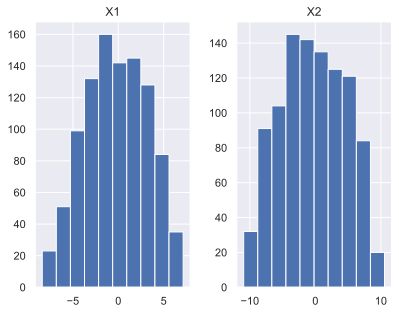

In [12]:
# histogram:
df.hist()

<AxesSubplot:>

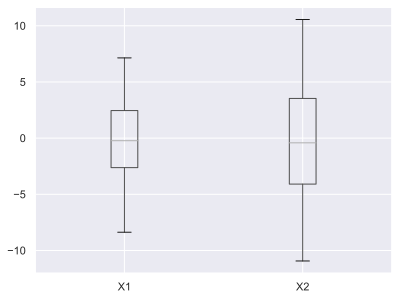

In [13]:
# boxplot
df.boxplot()

* Analytically using statistics: 

[IQR (Inter Quartile Range)](https://www.geeksforgeeks.org/interquartile-range-iqr/) Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.


In [14]:
## Example for X1 ##

# IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most 
# commonly used and most trusted approach used in the research field.

# Percentile 25
Q1 = np.percentile(df['X1'], 25,
                   method = 'midpoint')

# Percentile 75
Q3 = np.percentile(df['X1'], 75,
                   method = 'midpoint')

# IQR
IQR = Q3 - Q1

In [15]:
# upper bound:
upper = df['X1'] >= (Q3+3*IQR)
df[upper]

,X1,X2,Y


In [16]:
# lower bound:
lower = df['X1'] <= (Q1-3*IQR)
df[lower]

,X1,X2,Y


* Find outliers using IQR method for *X2*

In [17]:
## Example for X2 ##

# IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most 
# commonly used and most trusted approach used in the research field.

# Percentile 25
Q1 = np.percentile(df['X2'], 25,
                   method = 'midpoint')

# Percentile 75
Q3 = np.percentile(df['X2'], 75,
                   method = 'midpoint')

# IQR
IQR = Q3 - Q1

In [18]:
# upper bound:
upper = df['X2'] >= (Q3+3*IQR)
df[upper]

,X1,X2,Y


In [19]:
# lower bound:
lower = df['X2'] <= (Q1-3*IQR)
df[lower]

,X1,X2,Y


In this case there are no outliers, if there were, it would be necessary to decide what to do whether to eliminate them, replace them or leave them.

#### Encode categorical variables

* In our case, there are no categorical input variables.

* Convert target variable to factor

In [47]:
df.Y = df.Y.astype('category')
df.dtypes

X1     float64
X2     float64
Y     category
dtype: object

more info https://pandas.pydata.org/docs/user_guide/categorical.html

#### Analyse continuous variables

We shoud standarize variables, but in this practice we won't apply because in future we'll use a pipeline to make it easier all steps before modeling.

Relationship between variables. Our task is to find out if exists any relation between predictors. 
* Plot scatterplot (seaborn library) where:
    * x-axis = 'X1'
    * y-axis = 'X2'
    * hue = 'Y' (color of points according to Y categories)
    * data = df
    * title = 'Whole set'


Text(0.5, 1.0, 'Whole set')

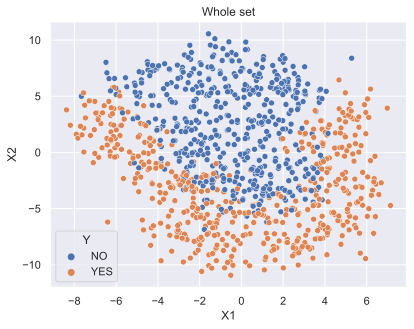

In [48]:
sns.scatterplot(x = 'X1', y = 'X2', hue = 'Y', data = df).set_title("Whole set")

* Plot pairplot (seaborn) where:
    - data = df
    - hue = 'Y'

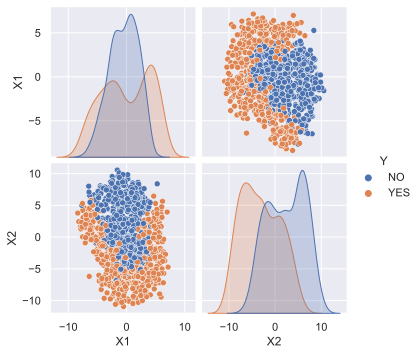

In [23]:
sns.pairplot(df, hue = 'Y')

To find out if exists collinearity is through the confusion matrix.

In [26]:
correlation = df.corr(method ='pearson')

<AxesSubplot:>

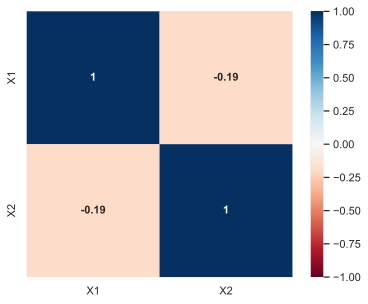

In [27]:
sns.heatmap(correlation, cmap='RdBu', vmin=-1, vmax=1, annot=True, 
            annot_kws={'fontsize':11, 'fontweight':'bold'},
           square=True)

#### Deal with class imbalances

To verify that there is class imbalance you should to observe the proportion of each category of target variable:

In [28]:
df['Y'].value_counts()*100/df['Y'].shape[0]

YES    50.05005
NO     49.94995
Name: Y, dtype: float64

### 3. Save preprocessed data

In [29]:
df.to_csv("data/preprocessed_data.csv", sep = ",", index = False)